In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [16]:
data = {
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance': [40, 50, 60, 65, 70, 75, 80, 85, 90, 95],
    'Pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study Hours  10 non-null     int64
 1   Attendance   10 non-null     int64
 2   Pass         10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None
       Study Hours  Attendance       Pass
count     10.00000   10.000000  10.000000
mean       5.50000   71.000000   0.600000
std        3.02765   17.606817   0.516398
min        1.00000   40.000000   0.000000
25%        3.25000   61.250000   0.000000
50%        5.50000   72.500000   1.000000
75%        7.75000   83.750000   1.000000
max       10.00000   95.000000   1.000000


In [18]:
print("Missing values:", df.isnull().sum())


Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


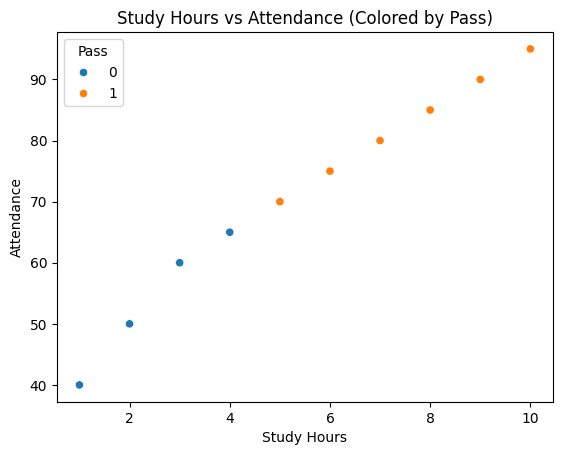

In [19]:
sns.scatterplot(data=df, x='Study Hours', y='Attendance', hue='Pass')
plt.title("Study Hours vs Attendance (Colored by Pass)")
plt.show()

In [20]:
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

Accuracy: 1.00


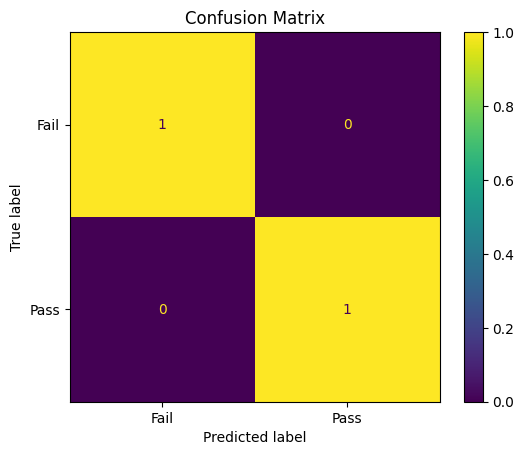

In [22]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [23]:

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print("Feature Importance:\n", coefficients)

Feature Importance:
        Feature  Coefficient
0  Study Hours     0.144169
1   Attendance     0.720686
